# Coursework Notebook

## Preprocessing

Download the dataset, let's take ncaltech for example. From https://www.garrickorchard.com/datasets/n-caltech101 we download the zip files into `data/download` then extract them into that directory. Use the following script to generate all event graphs.

In [8]:
! rm -rf $(pwd)/data/download/Caltech101/BACKGROUND_Google

! mkdir -p $(pwd)/data/preprocess/ncaltech101
! rm -rf $(pwd)/data/preprocess/ncaltech101/raw
! rm -rf $(pwd)/data/preprocess/ncaltech101/training
! rm -rf $(pwd)/data/preprocess/ncaltech101/annotations

! ln -s $(pwd)/data/download/Caltech101 $(pwd)/data/preprocess/ncaltech101/raw
! ln -s $(pwd)/data/download/Caltech101 $(pwd)/data/preprocess/ncaltech101/training
! ln -s $(pwd)/data/download/Caltech101_annotations $(pwd)/data/preprocess/ncaltech101/annotations

! PYTHONPATH=$(pwd) AEGNN_DATA_DIR=$(pwd)/data/preprocess python scripts/preprocessing.py --dataset "ncaltech101" --num-workers 8 --gpu 0


Global seed set to 12345
  0%|                                                  | 0/8242 [00:00<?, ?it/s]BEFORE DATA Data(x=[94757, 1], pos=[94757, 3], file_id='image_0059.bin', label=[1], y=[1], bbox=[1, 1, 5])
AFTER DATA Data(x=[25000, 1], pos=[25000, 3], file_id='image_0059.bin', label=[1], y=[1], bbox=[1, 1, 5])
BEFORE DATA Data(x=[102190, 1], pos=[102190, 3], file_id='image_0042.bin', label=[1], y=[1], bbox=[1, 1, 5])
AFTER DATA Data(x=[25000, 1], pos=[25000, 3], file_id='image_0042.bin', label=[1], y=[1], bbox=[1, 1, 5])
BEFORE DATA Data(x=[143771, 1], pos=[143771, 3], file_id='image_0020.bin', label=[1], y=[1], bbox=[1, 1, 5])
AFTER DATA Data(x=[25000, 1], pos=[25000, 3], file_id='image_0020.bin', label=[1], y=[1], bbox=[1, 1, 5])
  2%|▉                                       | 189/8242 [00:07<05:07, 26.19it/s]BEFORE DATA Data(x=[71735, 1], pos=[71735, 3], file_id='image_0056.bin', label=[1], y=[1], bbox=[1, 1, 5])
AFTER DATA Data(x=[25000, 1], pos=[25000, 3], file_id='image_0056

## Preparing dataset

The following code separates the original dataset into the training, validation, and test sets. It also separates the processed files.

In [15]:
import os, shutil, pathlib

def split_ncaltech_kfold(unzip_root, target_root, preproc_root, k, idx):

    if os.path.exists(target_root):
        shutil.rmtree(target_root)

    unzip_image_root = os.path.join(unzip_root, 'Caltech101')
    training_path = os.path.join(target_root, 'training')
    validation_path = os.path.join(target_root, 'validation')
    test_path = os.path.join(target_root, 'test')

    os.makedirs(training_path)
    os.makedirs(validation_path)
    os.makedirs(test_path)    

    unzip_subpaths = []
    classes_images = []

    for subfolder in sorted(os.listdir(unzip_image_root)):

        subpath = os.path.join(unzip_image_root, subfolder)
        unzip_subpaths.append(subpath)
        images = []
        for image in sorted(os.listdir(subpath)):
            images.append(os.path.join(subpath, image))
        classes_images.append(images)
    
    for class_images in classes_images:

        class_name = pathlib.Path(class_images[0]).parent.name
        class_training_path = os.path.join(training_path, class_name)
        class_validation_path = os.path.join(validation_path, class_name)
        class_test_path = os.path.join(test_path, class_name)
        class_training_proc_path = os.path.join(target_root, 'processed', 'training', class_name)
        class_validation_proc_path = os.path.join(target_root, 'processed', 'validation', class_name)

        os.makedirs(class_training_path)
        os.makedirs(class_validation_path)
        os.makedirs(class_test_path)
        # os.makedirs(class_training_proc_path)
        # os.makedirs(class_validation_proc_path)

        total_cnt = len(class_images)
        valid_cnt = round(total_cnt / k)
        valid_start = idx * valid_cnt
        valid_end = valid_start + valid_cnt - 1
        if(idx == k - 1):
            valid_end = total_cnt - 1
        image_idx = 0

        for image in class_images:
            image_name = os.path.basename(image)
            image_proc = os.path.join(preproc_root, class_name, image_name)
            if(image_idx >= valid_start and image_idx <= valid_end):
                os.symlink(image, os.path.join(class_validation_path, image_name))
                # os.symlink(image_proc, os.path.join(class_validation_proc_path, image_name))
            else:
                os.symlink(image, os.path.join(class_training_path, image_name))
                # os.symlink(image_proc, os.path.join(class_training_proc_path, image_name))
            os.symlink(image, os.path.join(class_test_path, image_name))
            image_idx += 1
    
    os.symlink(unzip_image_root, os.path.join(target_root, 'raw'))
    os.symlink(os.path.join(unzip_root, 'Caltech101_annotations'), os.path.join(target_root, 'annotations'))


In [16]:
# split dataset
split_ncaltech_kfold(unzip_root=os.path.join(os.getcwd(), 'data', 'download'),
                     target_root=os.path.join(os.getcwd(), 'data', 'storage', 'ncaltech101'),
                     preproc_root=os.path.join(os.getcwd(), 'data', 'preprocess', 'ncaltech101', 'processed', 'training'),
                     k=5, idx=0)

In [17]:
! PYTHONPATH=$(pwd) AEGNN_DATA_DIR=$(pwd)/data/storage python scripts/preprocessing.py --dataset "ncaltech101" --num-workers 8 --gpu 0

Global seed set to 12345
  0%|                                                  | 0/6593 [00:00<?, ?it/s]BEFORE DATA Data(x=[96797, 1], pos=[96797, 3], file_id='image_0010.bin', label=[1], y=[1], bbox=[1, 1, 5])
AFTER DATA Data(x=[25000, 1], pos=[25000, 3], file_id='image_0010.bin', label=[1], y=[1], bbox=[1, 1, 5])
BEFORE DATA Data(x=[72229, 1], pos=[72229, 3], file_id='image_0015.bin', label=[1], y=[1], bbox=[1, 1, 5])
AFTER DATA Data(x=[25000, 1], pos=[25000, 3], file_id='image_0015.bin', label=[1], y=[1], bbox=[1, 1, 5])
BEFORE DATA Data(x=[109258, 1], pos=[109258, 3], file_id='image_0016.bin', label=[1], y=[1], bbox=[1, 1, 5])
BEFORE DATA Data(x=[158968, 1], pos=[158968, 3], file_id='image_0033.bin', label=[1], y=[1], bbox=[1, 1, 5])
AFTER DATA Data(x=[25000, 1], pos=[25000, 3], file_id='image_0033.bin', label=[1], y=[1], bbox=[1, 1, 5])
AFTER DATA Data(x=[25000, 1], pos=[25000, 3], file_id='image_0016.bin', label=[1], y=[1], bbox=[1, 1, 5])
BEFORE DATA Data(x=[146147, 1], pos=[14

## Try some training and evaluation (Copy this line and paste it in the terminal)

In [1]:
! PYTHONPATH=$(pwd) AEGNN_DATA_DIR=$(pwd)/data/storage AEGNN_LOG_DIR=$(pwd)/data/log python scripts/train.py graph_res --task recognition --dataset "ncaltech101" --gpu 0 --batch-size 1 --dim 3 --max-epochs 10

Global seed set to 12345
/home/ryan/Developer/aegnn-official/aegnn/models/networks/graph_res.py:52: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.pool7 = MaxPoolingX(input_shape[:2] // 4, size=16)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
100%|███████████████████████████████████| 1649/1649 [00:00<00:00, 273300.17it/s]
/home/ryan/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:423: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  ra

FLOPS evaluation

In [1]:
! PYTHONPATH=$(pwd) AEGNN_DATA_DIR=$(pwd)/data/storage python evaluation/flops.py

  0%|                                                   | 0/100 [00:00<?, ?it/s]-----------------------
25000
25000
Data(x=[25000, 1], pos=[25000, 3], file_id='image_0015.bin', label=[1], y=[1], bbox=[1, 5], edge_index=[2, 760775], edge_attr=[760775, 3])
/home/ryan/Developer/aegnn-official/aegnn/models/networks/graph_res.py:52: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.pool7 = MaxPoolingX(input_shape[:2] // 4, size=16)
MODEL IS INITIALIZED
/home/ryan/anaconda3/envs/aegnn/lib/python3.8/site-packages/torch_geometric/nn/conv/spline_conv.py:133: UserWarning: We do not recommend using the non-optimized CPU version of `SplineConv`. If possible, please move 

In [16]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../aegnn_results/flops.pkl'

with open(file_path, 'rb') as file:
    flops_data = pickle.load(file)


In [17]:
flops_df = pd.DataFrame(flops_data)


In [20]:

# TODO: set save_to_excel = True if you run this block the first time 
save_to_excel = False
if save_to_excel == True:    
    # Specify the output file path
    output_file_path = 'results/flops_data_ncaltech101.xlsx'

    # Save the DataFrame to the Excel file
    flops_df.to_excel(output_file_path, index=False, engine='openpyxl')

In [18]:
flops_df['Mflops/ev'] = flops_df['flops'] / 1e6 / 25000

In [19]:
average_runtime = flops_df.groupby(['layer', 'model'])['runtime'].mean()
average_runtime

layer  model    
conv1  gnn_dense      0.564927
       ours           0.005706
conv2  gnn_dense     13.760342
       ours           0.114654
conv3  gnn_dense     26.563480
       ours           0.322608
conv4  gnn_dense     26.605923
       ours           0.446054
conv5  gnn_dense    106.773359
       ours           2.338612
conv6  gnn_dense      1.115509
       ours           0.125802
conv7  gnn_dense      1.116220
       ours           0.203127
fc     gnn_dense      0.000145
       ours           0.000320
norm1  gnn_dense      0.000765
       ours           0.000260
norm2  gnn_dense      0.001326
       ours           0.000498
norm3  gnn_dense      0.001310
       ours           0.000502
norm4  gnn_dense      0.001304
       ours           0.000537
norm5  gnn_dense      0.005944
       ours           0.003019
norm6  gnn_dense      0.000262
       ours           0.000082
norm7  gnn_dense      0.000293
       ours           0.000074
pool5  gnn_dense      0.100533
       ours           

In [20]:
average_flops = flops_df.groupby(['layer', 'model'])[['flops', 'Mflops/ev']].mean()
average_flops

flops     Mflops/ev
layer model                                
conv1 gnn_dense  1.356153e+09  5.424613e-02
      ours       9.958850e+04  3.983540e-06
conv2 gnn_dense  4.319576e+10  1.727830e+00
      ours       2.281181e+08  9.124723e-03
conv3 gnn_dense  8.638502e+10  3.455401e+00
      ours       7.296043e+08  2.918417e-02
conv4 gnn_dense  8.638502e+10  3.455401e+00
      ours       1.072153e+09  4.288613e-02
conv5 gnn_dense  3.455206e+11  1.382082e+01
      ours       5.867342e+09  2.346937e-01
conv6 gnn_dense  3.669571e+09  1.467828e-01
      ours       2.619175e+08  1.047670e-02
conv7 gnn_dense  3.669571e+09  1.467828e-01
      ours       4.843035e+08  1.937214e-02
fc    gnn_dense  2.048000e+05  8.192000e-06
      ours       1.245522e+04  4.982088e-07
norm1 gnn_dense  6.392515e+06  2.557006e-04
      ours       1.598193e+06  6.392771e-05
norm2 gnn_dense  2.557006e+07  1.022802e-03
      ours       3.196385e+06  1.278554e-04
norm3 gnn_dense  2.557006e+07  1.022802e-03
      ours       3.196385e+06  1.278554e-04
norm4 gnn_dense  2.557006e+07  1.022802e-03
      ours       3.196385e+06  1.278554e-04
norm5 gnn_dense  4.091209e+08  1.636484e-02
      ours       1.278554e+07  5.114216e-04
norm6 gnn_dense  5.561221e+06  2.224488e-04
      ours       1.737882e+05  6.951526e-06
norm7 gnn_dense  5.561221e+06  2.224488e-04
      ours       1.737882e+05  6.951526e-06
pool5 gnn_dense  1.717466e+05  6.869862e-06
      ours       7.790382e+04  3.116153e-06
total gnn_dense  5.706854e+11  2.282742e+01
      ours       8.667949e+09  3.467180e-01

In [42]:

# TODO: set save_to_excel = True if you run this block the first time 
save_to_excel = False

if save_to_excel:
    average_flops.to_excel('results/avg_flops_ncaltech101.xlsx', index=True, engine='openpyxl')
    average_runtime.to_excel('results/avg_runtime_ncaltech101.xlsx', index=True, engine='openpyxl')

In [22]:
df = pd.read_excel('results/avg_flops_ncaltech101.xlsx')
df['layer'] = df['layer'].fillna(method='ffill')
df

layer      model         flops     Mflops/ev
0   conv1  gnn_dense  1.356153e+09  5.424613e-02
1   conv1       ours  9.958850e+04  3.983540e-06
2   conv2  gnn_dense  4.319576e+10  1.727830e+00
3   conv2       ours  2.275952e+08  9.103807e-03
4   conv3  gnn_dense  8.638502e+10  3.455401e+00
5   conv3       ours  7.282018e+08  2.912807e-02
6   conv4  gnn_dense  8.638502e+10  3.455401e+00
7   conv4       ours  1.070012e+09  4.280047e-02
8   conv5  gnn_dense  3.455206e+11  1.382082e+01
9   conv5       ours  5.839331e+09  2.335732e-01
10  conv6  gnn_dense  3.669571e+09  1.467828e-01
11  conv6       ours  2.616406e+08  1.046562e-02
12  conv7  gnn_dense  3.669571e+09  1.467828e-01
13  conv7       ours  4.837923e+08  1.935169e-02
14     fc  gnn_dense  2.048000e+05  8.192000e-06
15     fc       ours  1.248786e+04  4.995144e-07
16  norm1  gnn_dense  6.392515e+06  2.557006e-04
17  norm1       ours  1.598193e+06  6.392771e-05
18  norm2  gnn_dense  2.557006e+07  1.022802e-03
19  norm2       ours  3.196385e+06  1.278554e-04
20  norm3  gnn_dense  2.557006e+07  1.022802e-03
21  norm3       ours  3.196385e+06  1.278554e-04
22  norm4  gnn_dense  2.557006e+07  1.022802e-03
23  norm4       ours  3.196385e+06  1.278554e-04
24  norm5  gnn_dense  4.091209e+08  1.636484e-02
25  norm5       ours  1.278554e+07  5.114216e-04
26  norm6  gnn_dense  5.561221e+06  2.224488e-04
27  norm6       ours  1.737882e+05  6.951526e-06
28  norm7  gnn_dense  5.561221e+06  2.224488e-04
29  norm7       ours  1.737882e+05  6.951526e-06
30  pool5  gnn_dense  1.717466e+05  6.869862e-06
31  pool5       ours  7.777570e+04  3.111028e-06
32  total  gnn_dense  5.706854e+11  2.282742e+01
33  total       ours  8.635083e+09  3.454033e-01

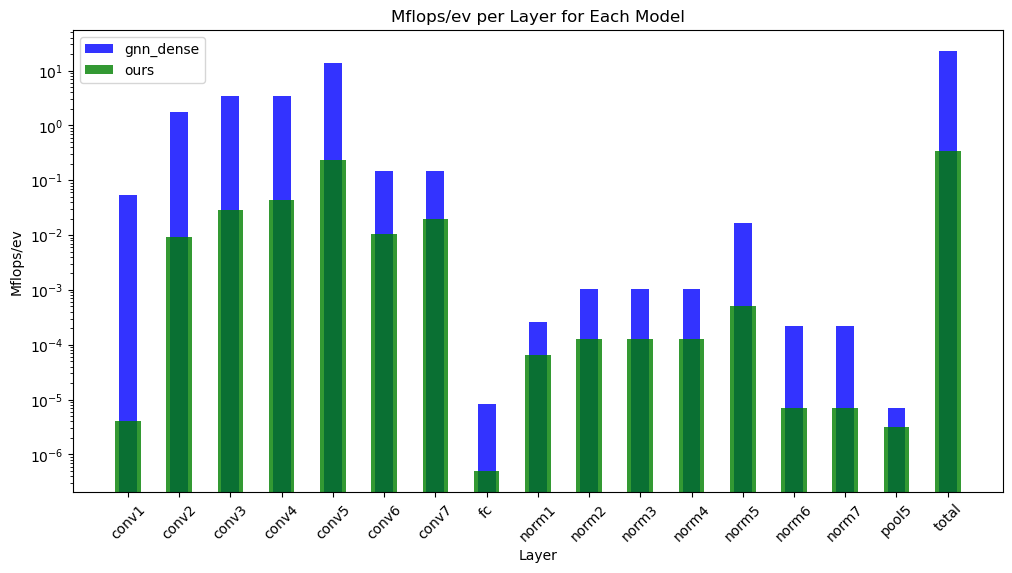

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
# Assuming the DataFrame is named average_flops

df = pd.read_excel('results/avg_flops_ncaltech101.xlsx')
df['layer'] = df['layer'].fillna(method='ffill')

# Reset the index to make 'Layer' and 'Model' regular columns
#df.reset_index(inplace=True)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
bar_width = 0.35
opacity = 0.8

# Filter the data for each model
gnn_dense_data = df[df['model'] == 'gnn_dense']
ours_data = df[df['model'] == 'ours']

# Create the bars for each model
gnn_dense_bars = ax.bar(gnn_dense_data['layer'], gnn_dense_data['Mflops/ev'], bar_width,
                        alpha=opacity, color='b', label='gnn_dense')
ours_bars = ax.bar(ours_data['layer'], ours_data['Mflops/ev'],
                   alpha=opacity, color='g', label='ours', align='center', width=0.5)

# Set up the axes labels, title, and legend
ax.set_ylabel('Mflops/ev')
ax.set_xlabel('Layer')
ax.set_yscale('log')

ax.set_title('Mflops/ev per Layer for Each Model')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plo

plt.savefig('results/bar_plot_Mflops_ev_ncaltech101.pdf', format='pdf', bbox_inches='tight')

plt.show()


In [24]:
import numpy as np
df_diff = df.pivot(index="layer", columns="model", values="Mflops/ev")
df_diff["log_diff"] = np.log10(df_diff["gnn_dense"]) - np.log10(df_diff["ours"])

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df_diff["log_diff"].plot(kind="bar", ax=ax)
ax.set_ylabel("Log Difference of Mflops/ev")
ax.set_title("Log Difference of Mflops/ev between Ours and GNN_Dense Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('results/bar_plot_diff_Mflops_ev_ncaltech101.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the DataFrame is named average_flops
df = pd.read_excel('results/avg_runtime_ncaltech101.xlsx')
df['layer'] = df['layer'].fillna(method='ffill')

# Reset the index to make 'Layer' and 'Model' regular columns
#df.reset_index(inplace=True)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
bar_width = 0.35
opacity = 0.8

# Filter the data for each model
gnn_dense_data = df[df['model'] == 'gnn_dense']
ours_data = df[df['model'] == 'ours']

# Create the bars for each model
gnn_dense_bars = ax.bar(gnn_dense_data['layer'], gnn_dense_data['runtime'], bar_width,
                        alpha=opacity, color='b', label='gnn_dense')
ours_bars = ax.bar(ours_data['layer'], ours_data['runtime'],
                   alpha=opacity, color='g', label='ours', align='center', width=0.5)

# Set up the axes labels, title, and legend
ax.set_ylabel('runtime [s]')
ax.set_xlabel('Layer')
ax.set_yscale('log')

ax.set_title('runtime [s] per Layer for Each Model')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plo

plt.savefig('results/bar_plot_runtime_ev_ncaltech101.pdf', format='pdf', bbox_inches='tight')

plt.show()


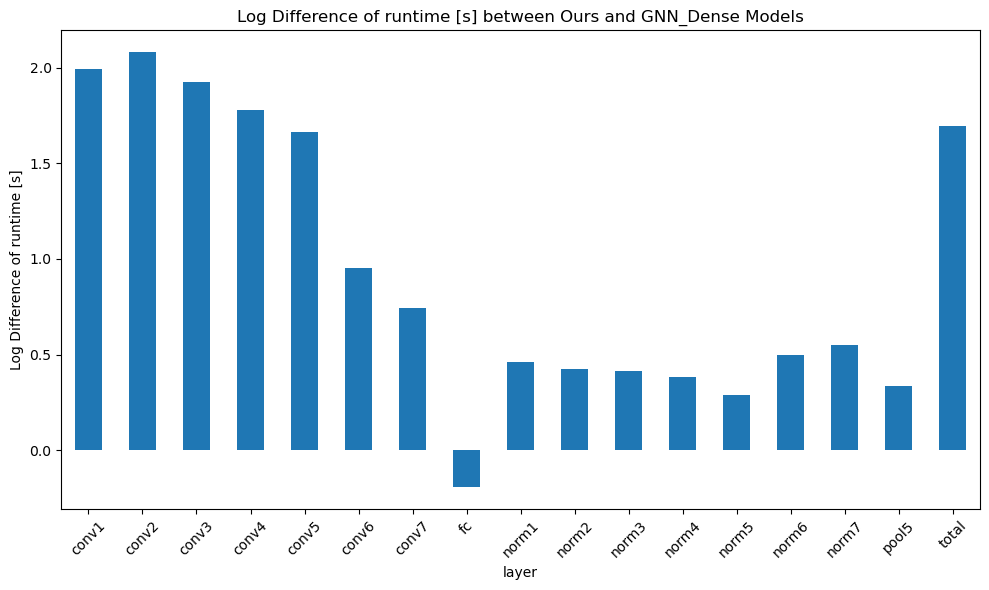

In [26]:
import numpy as np
df_diff = df.pivot(index="layer", columns="model", values="runtime")
df_diff["log_diff"] = np.log10(df_diff["gnn_dense"]) - np.log10(df_diff["ours"])

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df_diff["log_diff"].plot(kind="bar", ax=ax)
ax.set_ylabel("Log Difference of runtime [s]")
ax.set_title("Log Difference of runtime [s] between Ours and GNN_Dense Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('results/bar_plot_diff_runtime_ncaltech101.pdf', format='pdf', bbox_inches='tight')
plt.show()